# **Excercise Sheet 3:** Feature Selection and Regularization

# Part A: Foundations & Concepts

Before diving into coding and implementing feature selection and regularization techniques, it's important to understand the fundamental concepts and motivations behind these methods.

Take a moment to reflect on these concepts yourself before seeking additional help from ChatGPT 😉 You're also encouraged to discuss these ideas with your classmates.

## 1. General Concepts

### a) Why do we need to do feature seelction or regularization when wanting to do a linear regression model with a high number of features?

#### Your Answer:

#### Solution:
- Overfitting: the model may fit the training data too closely, capturing noise rather than the underlying pattern. Bad generalization to new data.
- Computational Cost: More features lead to increased computational complexity, making the model slower to train and evaluate.
- Interpretability: A model with too many features can be difficult to interpret.
- Numerical issues with model fitting, not able to estimate the coefficients properly.

### b) What does feature selection mean and how does it differ from regularization?

#### Your Answer:

#### Solution:
- Feature selection: Drop some features from the model, based on some criteria (e.g. correlation with target variable, statistical tests, etc.). The model is trained only on the selected features.
- Regularization: All features are still included in the model, but their impact is reduced.

### c) Can we be confident that we select the correct variables in feature selection?

#### Your Answer:

#### Solution:
- It depends, in general it's difficult.
- One issue could be that with a lot of predictors, some of them might just relate to the target by chance, and we might select them wrongly.
- Another issue is that with highly correlated predictors, we might select one of them, but not the other, even if both are important for the outcome. In this case Ridge regularization is better suited as it won't select one over the other, but rather reduce the impact of both.

# Part B: Coding & Visualization

Now let's apply our knowledge of feature selection and regularization! We start with some imports needed.

*Hint:* The functions imported from the Helper file, may help you in certain tasks, but you are not required to use them. You can also write your own code to achieve the same results. 

## Notes:
- Note: We need to use OLS for the summary table and haven't used it up to now (in handsons). Maybe we need to give a hint
- I think we should use the same dataset for all tasks, because this way we can compare the results.

In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import warnings

# Visualization
import seaborn as sns

# Scikit-learn: Data Processing
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scikit-learn: Models and Metrics
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Statistical Models
from statsmodels.api import OLS, add_constant

# Helper Functions
from helper import (
    plot_pca_cumvar,
    cross_validate_regularization,
    regularization_coef_progression,
    print_regression_table,
)

# Configuration
warnings.filterwarnings("ignore")

## 2. Linear Regression with high-dimensional data

TODO: Text about dataset once fixed

### a) Load and inspec the dataset `riboflavin.csv`
- What types of predictors and outcomes are present in the dataset?
- Plot pairplots of the first 5 variables (*hint:* use sns.pairplot)

In [2]:
# Student Code

In [3]:
# Load data
riboflavin = pd.read_csv('riboflavin.csv')

In [4]:
# Inspect Data
print(riboflavin.shape)
riboflavin.head()

(71, 4089)


,y,x.AADK_at,x.AAPA_at,x.ABFA_at,x.ABH_at,x.ABNA_at,x.ABRB_at,x.ACCA_at,x.ACCB_at,x.ACCC_at,...,x.YYDF_i_at,x.YYDG_at,x.YYDH_at,x.YYDI_at,x.YYDJ_at,x.YYDK_at,x.YYXA_at,x.YYZB_at,x.YYZE_at,x.zur_at
0,-6.643856,8.492404,8.111451,8.320842,10.287112,8.261279,10.208273,9.745474,9.818821,9.676227,...,7.882737,5.440163,4.981684,6.481998,5.363919,7.773494,7.668711,3.762119,7.172823,7.427105
1,-6.947862,7.639380,7.239965,7.289051,9.862287,7.303497,9.500023,9.216008,9.854946,9.650078,...,7.912135,5.383739,4.597438,6.390127,4.763876,7.336261,7.600104,3.761616,7.187113,7.545287
2,-7.930160,8.088340,7.855510,7.793395,9.676720,7.098273,9.473917,9.580384,9.926077,9.787129,...,7.354618,5.718795,4.468228,6.123498,5.400686,7.573388,7.873352,3.741953,7.251285,7.718321
3,-8.287712,7.886820,7.939513,7.997588,9.680562,7.408494,9.788725,9.447722,9.852773,9.546915,...,7.691985,5.561048,4.787030,5.904708,5.139692,7.214269,7.384115,3.887179,7.117375,7.260654
4,-7.310432,6.805762,7.554522,7.609902,8.551953,7.712407,8.490847,8.696249,8.573272,8.589661,...,7.999088,5.549914,5.258139,6.206778,4.910169,6.884474,6.996956,4.034177,7.722534,6.828164


In [5]:
# Check the features and outcomes
print("Features:")
print(riboflavin.columns.tolist())

Features:
['y', 'x.AADK_at', 'x.AAPA_at', 'x.ABFA_at', 'x.ABH_at', 'x.ABNA_at', 'x.ABRB_at', 'x.ACCA_at', 'x.ACCB_at', 'x.ACCC_at', 'x.ACDA_at', 'x.ACKA_at', 'x.ACOA_at', 'x.ACOB_at', 'x.ACOC_at', 'x.ACOL_at', 'x.ACOR_at', 'x.ACPA_at', 'x.ACSA_at', 'x.ACUA_at', 'x.ACUB_at', 'x.ACUC_at', 'x.ADAA_at', 'x.ADAB_at', 'x.ADDA_at', 'x.ADDB_at', 'x.ADEC_at', 'x.ADHA_at', 'x.ADHB_at', 'x.ADK_at', 'x.AHPC_at', 'x.AHPF_at', 'x.AHRC_at', 'x.ALAS_at', 'x.ALD_at', 'x.ALDX_at', 'x.ALDY_at', 'x.ALKA_at', 'x.ALSD_at', 'x.ALSR_at', 'x.ALSS_at', 'x.ALST_at', 'x.AMHX_at', 'x.AMPS_at', 'x.AMYC_at', 'x.AMYD_at', 'x.AMYE_at', 'x.AMYX_at', 'x.ANSA_at', 'x.ANSB_at', 'x.ANSR_at', 'x.APPA_at', 'x.APPB_at', 'x.APPC_at', 'x.APPD_at', 'x.APPF_at', 'x.APRE_at', 'x.APRX_at', 'x.APT_at', 'x.ARAA_at', 'x.ARAB_at', 'x.ARAD_at', 'x.ARAE_at', 'x.ARAL_at', 'x.ARAM_at', 'x.ARAN_at', 'x.ARAP_at', 'x.ARAQ_at', 'x.ARAR_at', 'x.ARGB_at', 'x.ARGC_at', 'x.ARGD_at', 'x.ARGE_at', 'x.ARGF_at', 'x.ARGG_at', 'x.ARGH_at', 'x.ARGJ_at', 

In [6]:
# Check for categorical features and their values
print("Data types:")
print(riboflavin.dtypes)

Data types:
y            float64
x.AADK_at    float64
x.AAPA_at    float64
x.ABFA_at    float64
x.ABH_at     float64
              ...   
x.YYDK_at    float64
x.YYXA_at    float64
x.YYZB_at    float64
x.YYZE_at    float64
x.zur_at     float64
Length: 4089, dtype: object


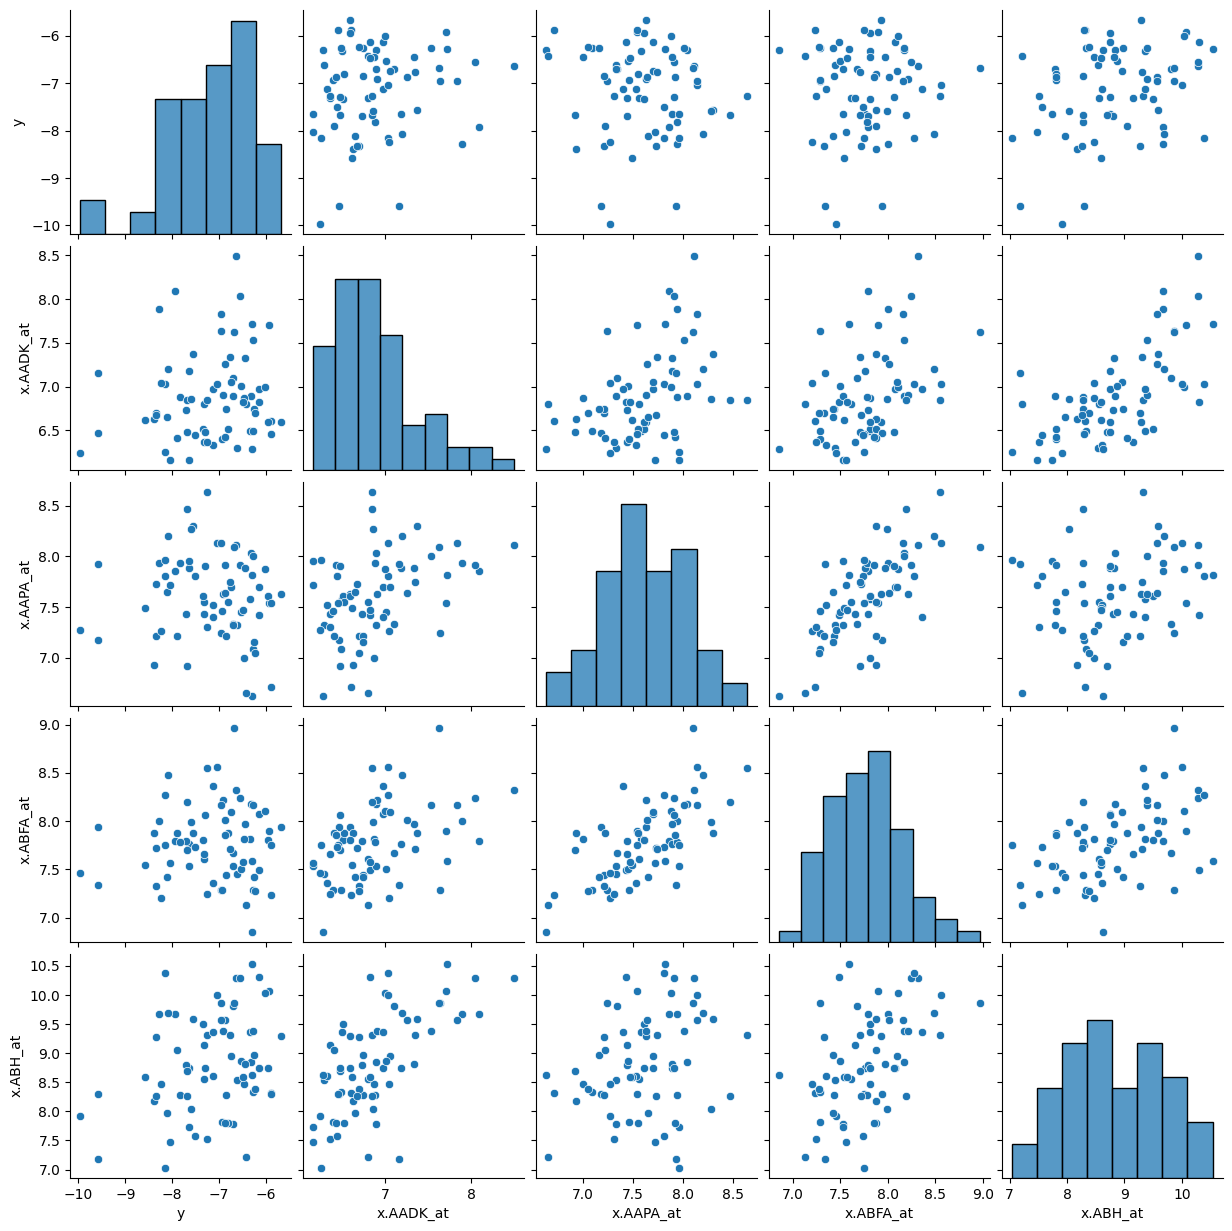

In [7]:
# pairplot of the first 5 variables
sns.pairplot(riboflavin.iloc[:, :5])

In [8]:
X = riboflavin.drop(columns=['y'])
y = riboflavin['y']

### b) Split the dataset into training and test set (70%/30% split)

In [9]:
# Student Code

In [10]:
# Split the Dataset into training and test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### c) Perform a linear regression using first using all features.

In [11]:
# Student Code

In [12]:
# Perform linear regression using all features
# Fit the model
model_full = LinearRegression()
model_full.fit(X_train, y_train);

print_regression_table(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Jul 2025   Prob (F-statistic):                nan
Time:                        15:37:43   Log-Likelihood:                 1498.7
No. Observations:                  49   AIC:                            -2899.
Df Residuals:                       0   BIC:                            -2807.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.882e-05        inf        

All coefficients are very small and p-values are NaN, because the model is not able to estimate the coefficients properly (due to p >> n).

### d) Now perform a linear regression using only the first 10 features.
- Compare the regression tables.

In [13]:
# Student Code

In [14]:
# Perform a linear regresion using the first 10 features

num_features = 10

X_train_reduced = X_train.iloc[:, :num_features]
X_test_reduced = X_test.iloc[:, :num_features]

model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train);

print_regression_table(X_train_reduced, y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1.817
Date:                Wed, 16 Jul 2025   Prob (F-statistic):             0.0908
Time:                        15:37:44   Log-Likelihood:                -54.129
No. Observations:                  49   AIC:                             130.3
Df Residuals:                      38   BIC:                             151.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1567      4.364     -0.494      0.6

### e) Calculate MSE and R2 for both models on the training data. What can you conclude?

In [15]:
# Student Code

In [16]:
# Compute MSE and R2 for both models

# Predictions for the full model
y_pred_full = model_full.predict(X_train)
mse_full = mean_squared_error(y_train, y_pred_full)
r2_full = r2_score(y_train, y_pred_full)

print(f"Full Model Training MSE:{mse_full:.4f}")
print(f"Full Model Training R2:{r2_full:.4f}")


Full Model Training MSE:0.0000
Full Model Training R2:1.0000


In [17]:
# Predictions for the reduced model
y_pred_reduced = model_reduced.predict(X_train_reduced)
mse_reduced = mean_squared_error(y_train, y_pred_reduced)
r2_reduced = r2_score(y_train, y_pred_reduced)

print(f"Reduced Model Training MSE:{mse_reduced:.4f}")
print(f"Reduced Model Training R2:{r2_reduced:.4f}")

Reduced Model Training MSE:0.5334
Reduced Model Training R2:0.3234


We see that the full model nearly finds a perfect fit on the training data, while the reduced model has a much lower R2 and higher MSE. This is could lead to the conclusion that the full model is outperforming the reduced model.

### f) Now predict and calculate MSE and R2 for both models on the test data. 
- Is there a difference? 
- What can you conclude?

TODO: Overfitting Not visible with this dataset!

In [18]:
# Predictions on test data full model
y_test_pred_full = model_full.predict(X_test)
mse_test_full = mean_squared_error(y_test, y_test_pred_full)
r2_test_full = r2_score(y_test, y_test_pred_full)

print(f"Full Model Test MSE:{mse_test_full:.4f}")
print(f"Full Model Test R2:{r2_test_full:.4f}")

Full Model Test MSE:0.2346
Full Model Test R2:0.7474


In [19]:
# Predictions on test data reduced model
y_test_pred_reduced = model_reduced.predict(X_test_reduced)
mse_test_reduced = mean_squared_error(y_test, y_test_pred_reduced)
r2_test_reduced = r2_score(y_test, y_test_pred_reduced)

print(f"Reduced Model Test MSE:{mse_test_reduced:.4f}")
print(f"Reduced Model Test R2:{r2_test_reduced:.4f}")

Reduced Model Test MSE:0.6806
Reduced Model Test R2:0.2673


## 3. PCA Regression

### a) Load the dataset `leukemia.csv`
- What types of predictors and outcomes are present in the dataset?
- Plot pairplots of the first 5 variables

- Note:
We keep the same dataset as before currently

In [20]:
# Load dataset
leukemia = pd.read_csv('leukemia.csv')

In [21]:
# Inspect Data
print(leukemia.shape)
leukemia.head()

(72, 3572)


,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.3563,x.3564,x.3565,x.3566,x.3567,x.3568,x.3569,x.3570,x.3571,y
0,0.561549,0.213566,-0.636584,0.347124,0.545509,1.720235,1.855733,1.800899,0.109675,-0.288622,...,0.126567,0.612847,0.443502,0.859035,-0.672449,0.150163,0.068992,0.129263,-0.533470,0
1,-0.623141,-0.912107,-0.465296,-0.734345,-0.539898,0.000112,-0.717583,0.733661,0.018900,-0.159573,...,-0.146952,-0.453801,-0.527682,-0.457939,0.412000,0.392065,0.054326,0.007136,-1.148372,0
2,-0.814524,-1.084069,-0.583127,1.785912,1.445064,1.099342,1.111595,1.178676,-0.193477,-0.116155,...,0.620945,1.117184,1.572018,-0.355646,0.921390,-1.207114,0.479036,1.546484,-0.391755,0
3,0.229492,-0.965719,-0.525060,-0.188016,-0.534603,1.177447,1.057922,1.126832,0.289006,-0.085842,...,-1.229743,0.739719,0.115690,-0.110720,0.581664,-1.001332,-0.197117,-0.990989,-0.924845,0
4,-0.706016,0.660884,-0.548306,-0.702840,-0.285707,0.428307,1.144897,-0.180164,0.194169,0.251461,...,-1.909517,-1.208151,-1.095057,-0.391334,-0.023814,0.639460,-1.816627,0.140519,-1.194537,0


In [22]:
# Check the features and outcomes
print("Features:")
print(leukemia.columns.tolist())

Features:
['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10', 'x.11', 'x.12', 'x.13', 'x.14', 'x.15', 'x.16', 'x.17', 'x.18', 'x.19', 'x.20', 'x.21', 'x.22', 'x.23', 'x.24', 'x.25', 'x.26', 'x.27', 'x.28', 'x.29', 'x.30', 'x.31', 'x.32', 'x.33', 'x.34', 'x.35', 'x.36', 'x.37', 'x.38', 'x.39', 'x.40', 'x.41', 'x.42', 'x.43', 'x.44', 'x.45', 'x.46', 'x.47', 'x.48', 'x.49', 'x.50', 'x.51', 'x.52', 'x.53', 'x.54', 'x.55', 'x.56', 'x.57', 'x.58', 'x.59', 'x.60', 'x.61', 'x.62', 'x.63', 'x.64', 'x.65', 'x.66', 'x.67', 'x.68', 'x.69', 'x.70', 'x.71', 'x.72', 'x.73', 'x.74', 'x.75', 'x.76', 'x.77', 'x.78', 'x.79', 'x.80', 'x.81', 'x.82', 'x.83', 'x.84', 'x.85', 'x.86', 'x.87', 'x.88', 'x.89', 'x.90', 'x.91', 'x.92', 'x.93', 'x.94', 'x.95', 'x.96', 'x.97', 'x.98', 'x.99', 'x.100', 'x.101', 'x.102', 'x.103', 'x.104', 'x.105', 'x.106', 'x.107', 'x.108', 'x.109', 'x.110', 'x.111', 'x.112', 'x.113', 'x.114', 'x.115', 'x.116', 'x.117', 'x.118', 'x.119', 'x.120', 'x.121', 'x.122',

In [23]:
# Check for categorical features and their values
print("Data types:")
print(leukemia.dtypes)

Data types:
x.1       float64
x.2       float64
x.3       float64
x.4       float64
x.5       float64
           ...   
x.3568    float64
x.3569    float64
x.3570    float64
x.3571    float64
y           int64
Length: 3572, dtype: object


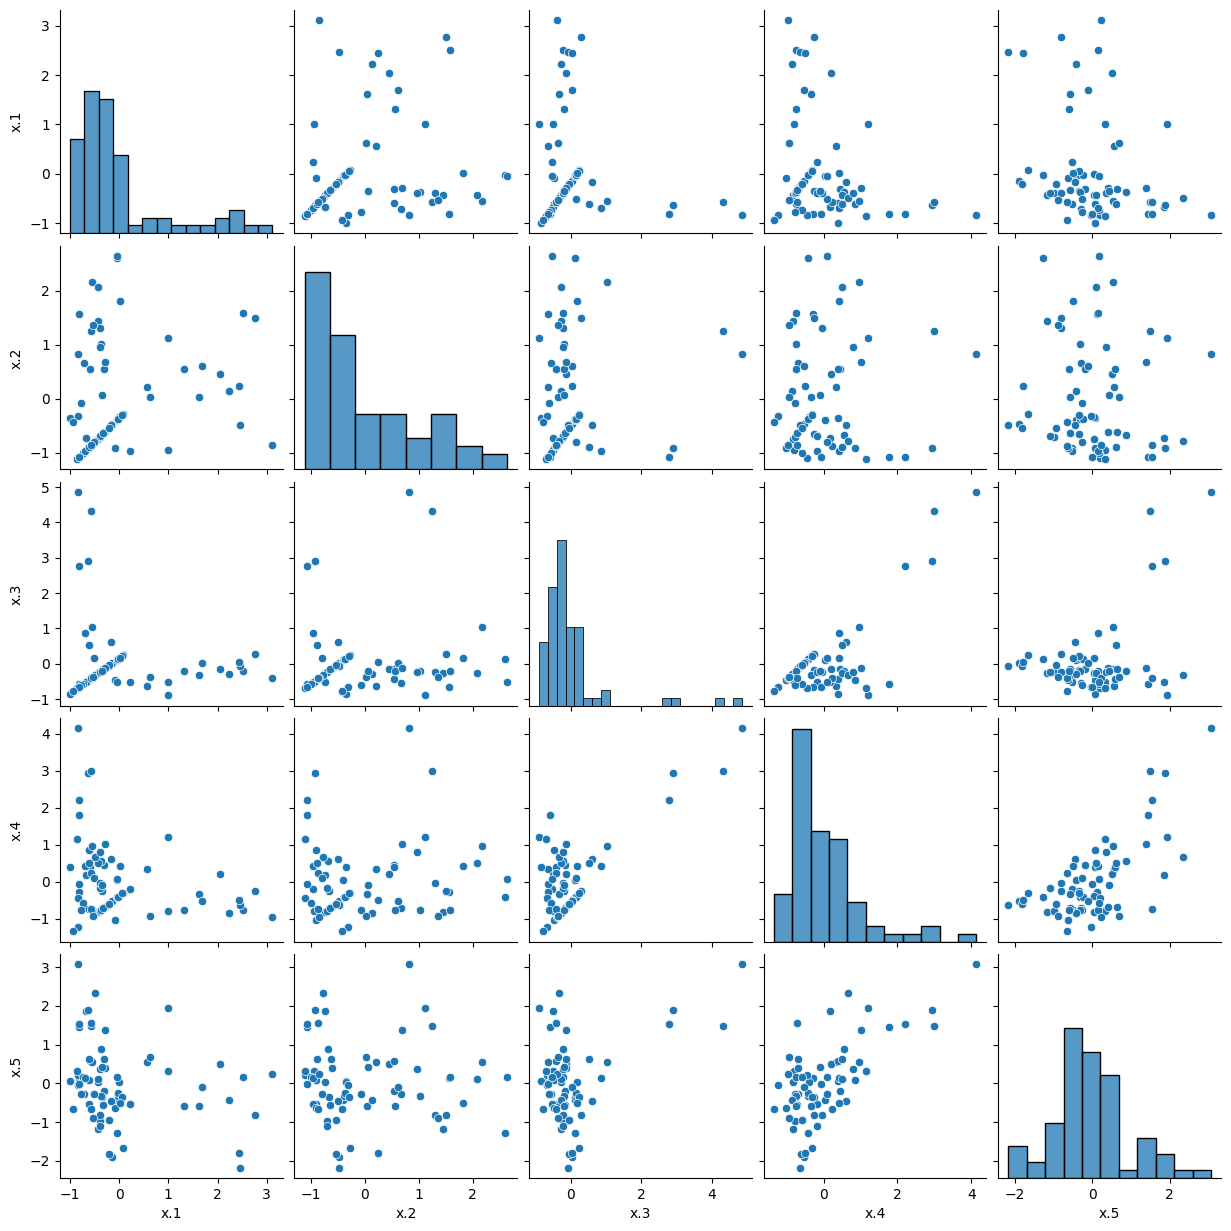

In [24]:
# pairplot of the first 5 variables
sns.pairplot(leukemia.iloc[:, :5])

In [25]:
X = leukemia.drop(columns=['y'])
y = leukemia['y']

print(y.value_counts())

y
0    47
1    25
Name: count, dtype: int64


In [26]:
# # Split the Dataset into training and test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)   

### b) Fit a linear regression model using all features.
- Print the regression table.

In [27]:
# Student Code

In [28]:
# Perform Linear Regression using all features
model_full = LinearRegression()
model_full.fit(X_train, y_train);
print_regression_table(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Jul 2025   Prob (F-statistic):                nan
Time:                        15:37:47   Log-Likelihood:                 1612.6
No. Observations:                  50   AIC:                            -3125.
Df Residuals:                       0   BIC:                            -3030.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0219        inf          0        n

In [29]:
# Predict test mse

y_test_pred_full = model_full.predict(X_test)
mse_test_full = mean_squared_error(y_test, y_test_pred_full)
r2_test_full = r2_score(y_test, y_test_pred_full)

print(f"Full Model Test MSE:{mse_test_full:.4f}")
print(f"Full Model Test R2:{r2_test_full:.4f}")

Full Model Test MSE:0.0422
Full Model Test R2:0.8253


### b) Perform PCA on the dataset. 
- Is it important to scale the data before PCA? 

*Hint:* Check if the units of the data differs

In [30]:
# Student Code

In [31]:
# Optional Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Perform PCA on the dataset, compute 30 principal components
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In this case I'd say it's not necessary to scale the data, since all features are genetic data and have the same unit (gene expression).

### d) Plot the cumulative explained variance. How many are needed to explain 80% of the variance?

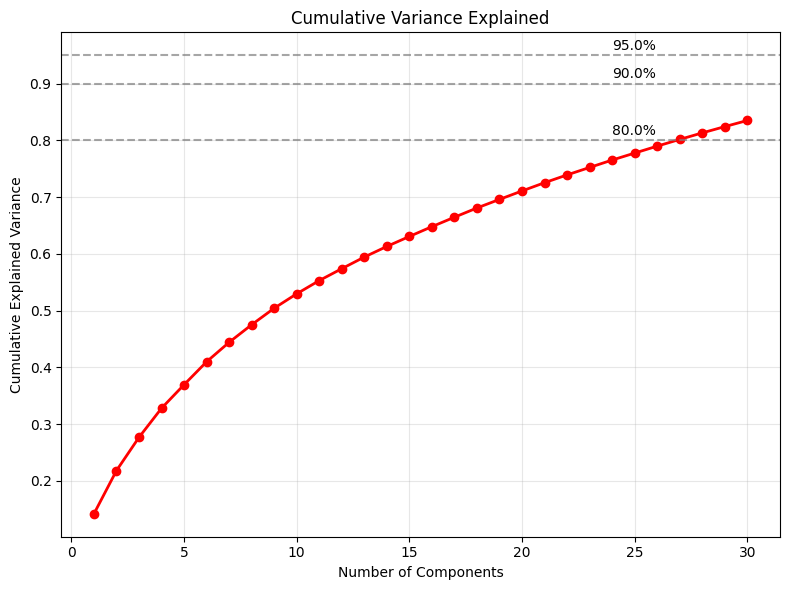

In [33]:
plot_pca_cumvar(pca)

Around 11 components are needed to explain 80% of the variance.

### e) Now let's compute the linear regression on the principal components
- Use enough principal components to explain 80% of the variance.

*Hint:* if you did not solve the previous exercise, continue with 10 principal components (or all).

In [34]:
# Student Code

In [35]:
# Fit linear regression on PCA components
num_pc = 27

X_train_pca_reduced = X_train_pca[:, :num_pc]
X_test_pca_reduced = X_test_pca[:, :num_pc]

model_pca = LinearRegression()
model_pca.fit(X_train_pca_reduced, y_train);

### f) Print the regression table. Are the coefficients interpretable?

In [36]:
print_regression_table(X_train_pca_reduced, y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     15.97
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           3.69e-09
Time:                        15:37:48   Log-Likelihood:                 42.814
No. Observations:                  50   AIC:                            -29.63
Df Residuals:                      22   BIC:                             23.91
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3200      0.022     14.604      0.0

Coefficients are interpretable but meaningful interpretation is challenging. We have to look at the loadings of the different PCs. If the first two PCs show different loadings of clinically meaningful features, then the coefficients can be meaningful interpreted. Otherwise rather challenging. 

But we reduce computational power and importantly overfitting with PCA regression compared to regression with all predictors.

### g) Calculate MSE and R2 for the PCA regression on the test data. 
- Compare it to the full model mse.
- What can you conclude?


In [37]:
# Student Code

In [38]:
# Calculate MSE and R2 for PCA model
y_pred_pca = model_pca.predict(X_test_pca_reduced)
mse_test_pca = mean_squared_error(y_test, y_pred_pca)
r2_test_pca = r2_score(y_test, y_pred_pca)

print(f"Full Model Test MSE:{mse_test_full:.4f}")
print(f"Full Model Test R2:{r2_test_full:.4f}")

print(f"PCA Model Test MSE:{mse_test_pca:.4f}")
print(f"PCA Model Test R2:{r2_test_pca:.4f}")

Full Model Test MSE:0.0422
Full Model Test R2:0.8253
PCA Model Test MSE:0.0418
PCA Model Test R2:0.8270


TODO: Interpretation once fixed dataset

## 4. Ridge and Lasso Regression

We reuse the same dataset as before, but now we want to apply regularization techniques.

### a) Fit Ridge regression with different alphas using training data.
- What is the optimal alpha?

*Hint:* Use the `RidgeCV` function from `sklearn.linear_model` to find the optimal alpha.

In [39]:
# Student Code

In [40]:
alphas = np.logspace(-5, 8, 50)

# Option A: Using RidgeCV
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
optimal_alpha = ridge_cv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 1e-05


In [41]:
import matplotlib.pyplot as plt

# TODO: Add this function to handson

from helper import plot_regularization_path

Alphas length: 50
CV scores length: 50
CV stds length: 50


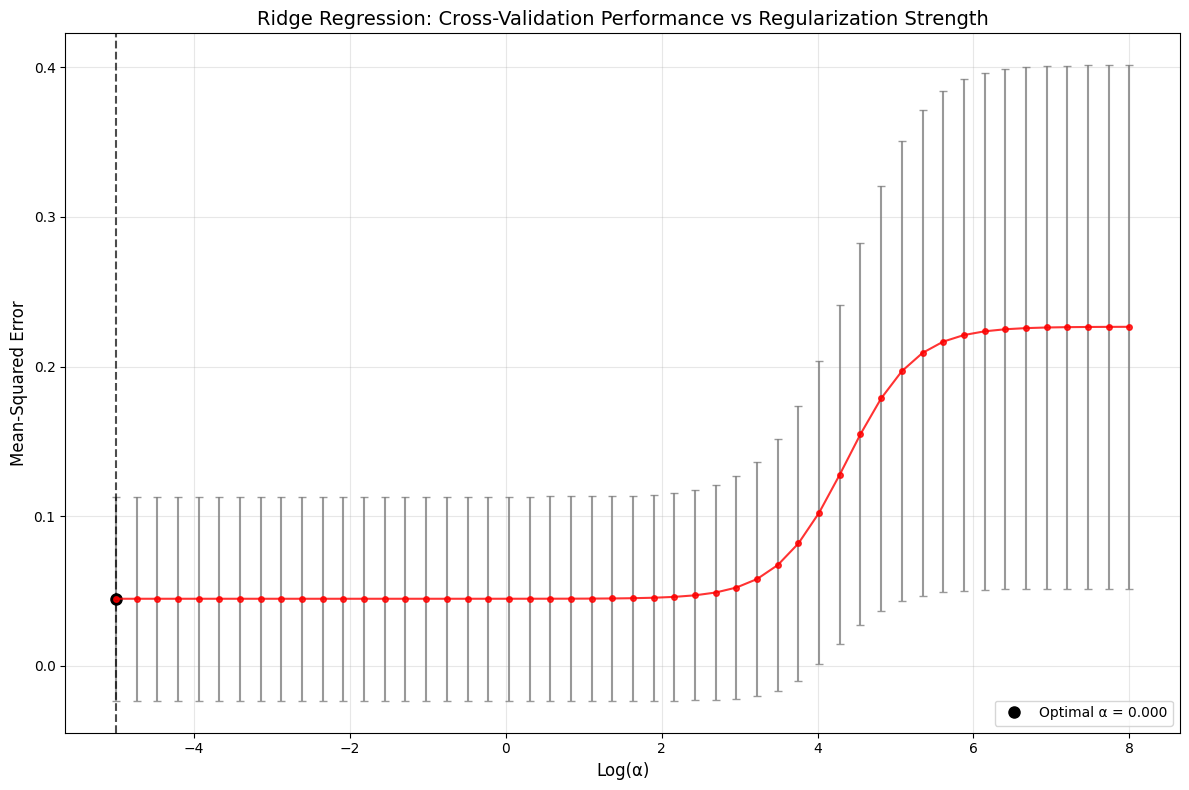

np.float64(1e-05)

In [42]:
plot_regularization_path(ridge_cv, model_name="Ridge")

Why do we have different alphas??

### e) Show coefficient shrinkage for different alphas. 
- What do you observe? 
- Do you expect coefficients to be zero for some alphas?

In [43]:
# Student Code

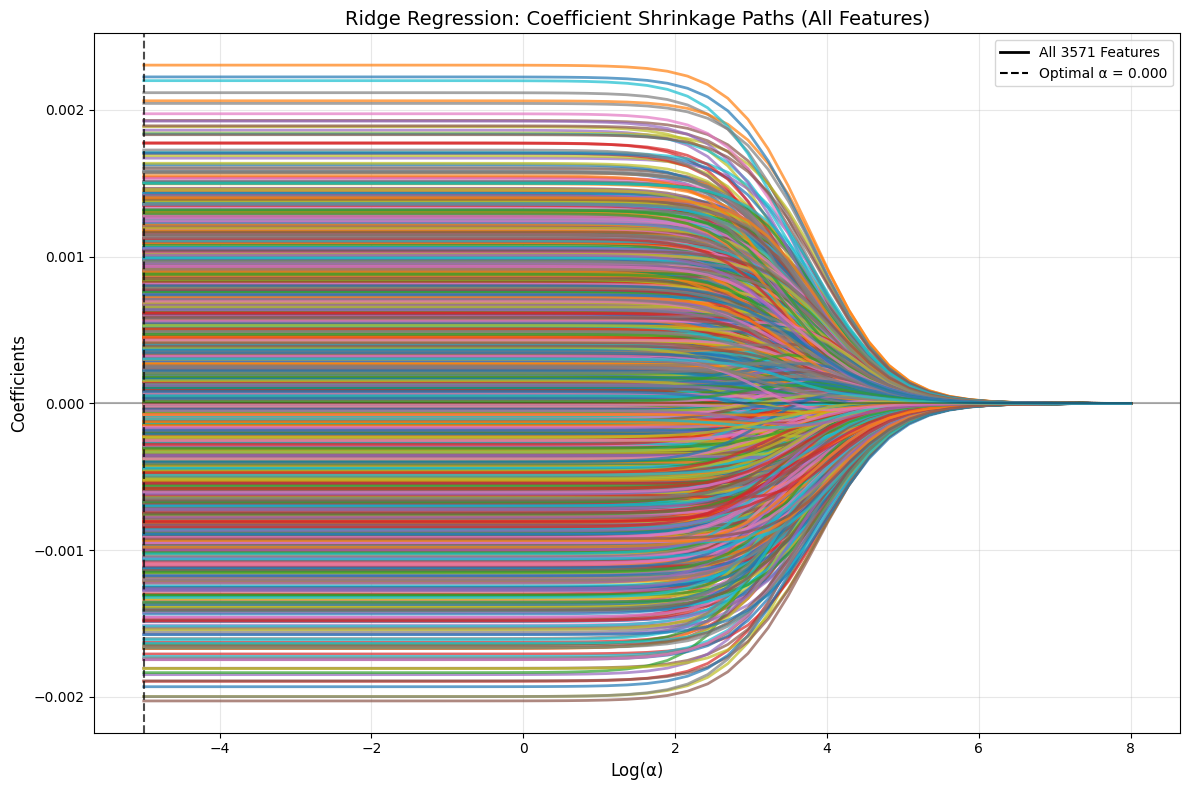

In [44]:
# Coef progression
regularization_coef_progression(
    X_train, y_train, alphas=alphas, model_name='Ridge', optimal_alpha=optimal_alpha)

We can see that with ridge regression, coefficients are shrunk towards zero, but not to zero.

### f) Fit Lasso regression with different alphas using training data

In [45]:
# Student Code

In [46]:
alphas = np.logspace(-5, 3, 50)

# Using LassoCV
lasso_cv = LassoCV(alphas=alphas, )
lasso_cv.fit(X_train, y_train)
optimal_alpha = lasso_cv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 1e-05


Alphas length: 50
CV scores length: 50
CV stds length: 50


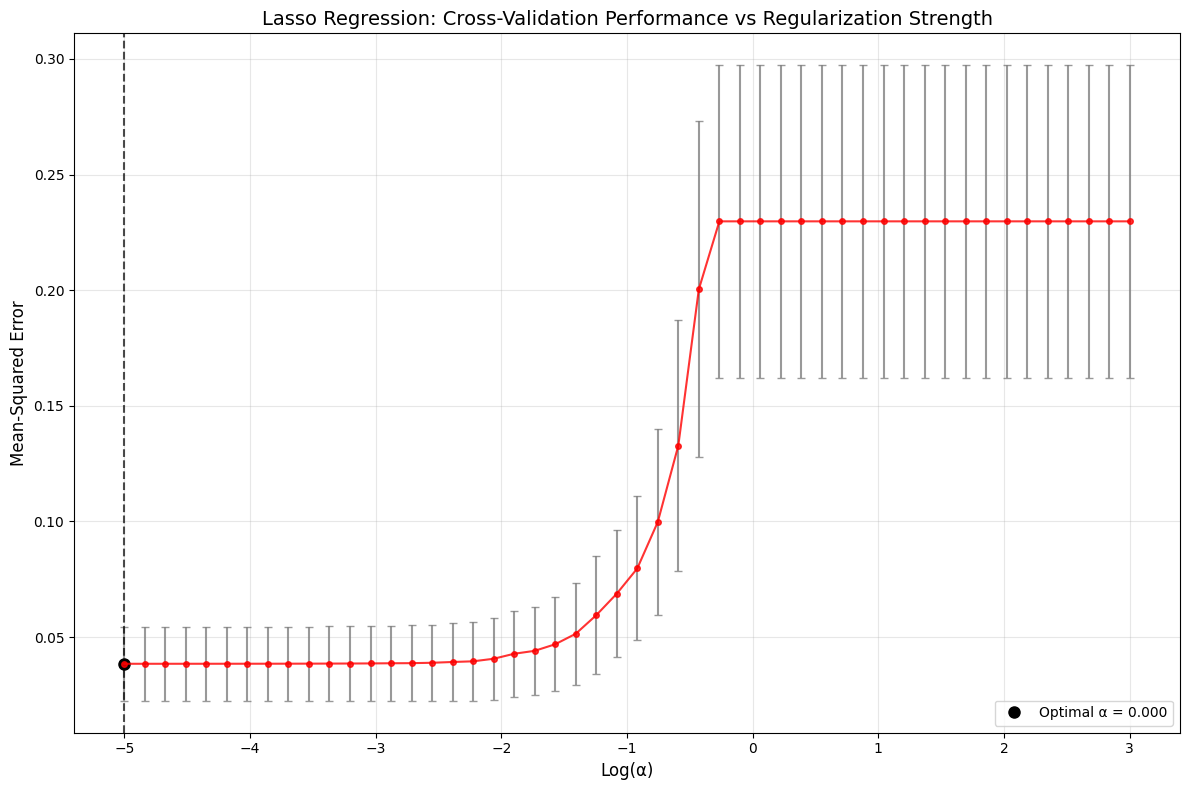

np.float64(1e-05)

In [47]:
# Now use the fixed function
plot_regularization_path(lasso_cv, model_name="Lasso")

### g) Show the coefficients for each alpha. 
- How do they change with increasing alpha? 
- Are features dropped?

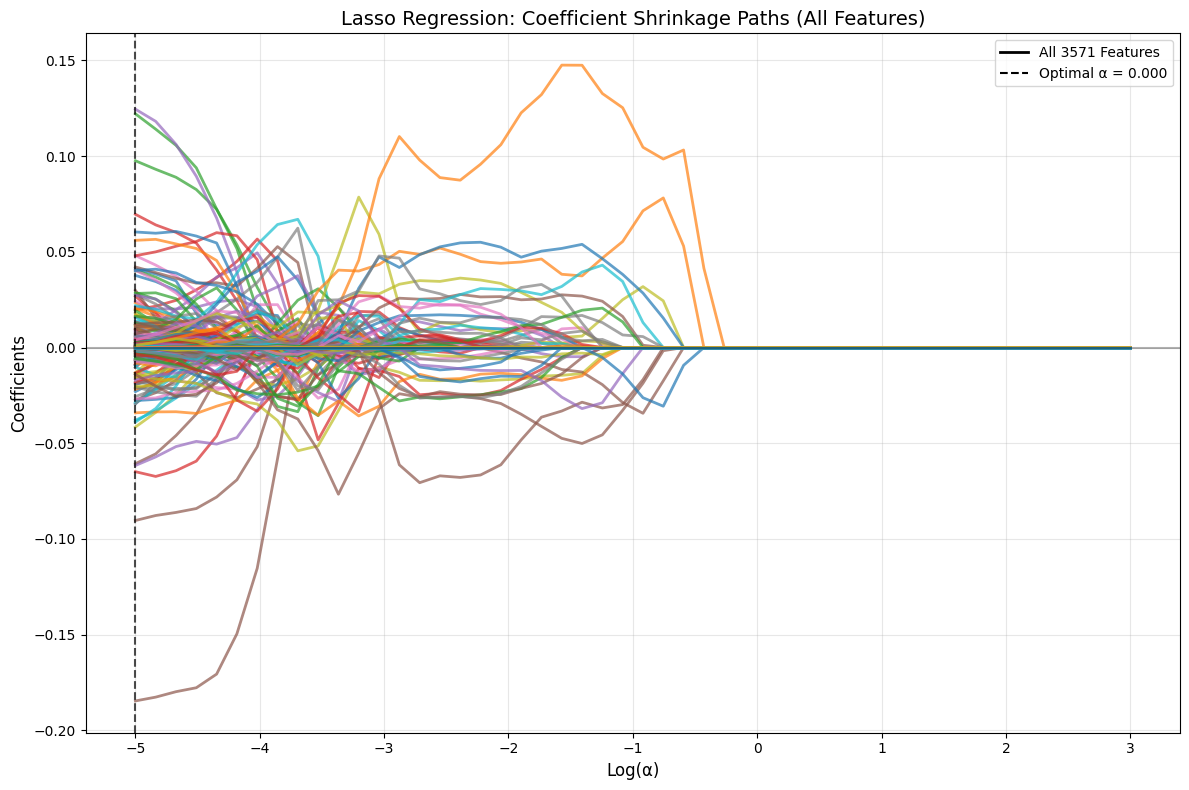

In [48]:
# Coef progression
regularization_coef_progression(
    X_train, y_train, alphas=alphas, model_name='Lasso', optimal_alpha=optimal_alpha)

### h) Compare all Models using MSE and R2 on the test data. 
- Which model performs best?
- Linear Regression on all features, PCA Regression, Ridge and Lasso Regression

In [49]:
# Student Code

In [50]:
# Fit Ridge Regression on features
y_ridge_pred = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

In [51]:
# Fit Lasso Regression on features
y_lasso_pred = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

In [52]:
# Create a DataFrame to compare all models' performance metrics

model_comparison = pd.DataFrame({
    'Model': ['Full Linear Regression', 'PCA Regression', 'Ridge Regression', 'Lasso Regression'],
    'Test MSE': [mse_test_full, mse_test_pca, mse_ridge, mse_lasso],
    'Test R2': [r2_test_full, r2_test_pca, r2_ridge, r2_lasso]
})

# Sort by Test MSE to see best performers
model_comparison = model_comparison.sort_values('Test MSE')

# Format the values for better readability
model_comparison['Test MSE'] = model_comparison['Test MSE'].map('{:.4f}'.format)
model_comparison['Test R2'] = model_comparison['Test R2'].map('{:.4f}'.format)

model_comparison

,Model,Test MSE,Test R2
2,Ridge Regression,0.0407,0.8316
1,PCA Regression,0.0418,0.8270
0,Full Linear Regression,0.0422,0.8253
3,Lasso Regression,0.1142,0.5275


TODO: Interpretation once fixed.

## 5. Cross-Validation

### a) What is the difference between train-test split and cross-validation?

#### Your Answer:


#### Solution:
In cross validation all data is used once as train or test. Usually used when not having a lot of data. Train-test split is used when you have a lot of data and you can afford to keep some data only for test set. 

### b) Perform a cross-validation(5-folds) with the lasso model from last exercise. 
- Report the MSE for all folds. 
- Are they different to the MSE of the test set form the previous exercise?

In [53]:
# Student Code

In [54]:
# Cross Validation with 5-folds for Lasso, import cross_val_score
scores = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE scores: {[-float(round(score, 4)) for score in scores]}")
print(f"Average Cross-validated MSE: {-scores.mean():.4f}")

Cross-validated MSE scores: [0.043, 0.0332, 0.0827, 0.0209, 0.0803]
Average Cross-validated MSE: 0.0520


Yes we see quit a difference depending on the fold!

### c) Finally we introduce a new concept which is common in clincal data science. "Leave-One-Out Cross-Validation" (LOOCV). 
- In this method, we leave one sample out for testing and use the rest for training. - - - This is repeated for each sample in the dataset. 
- Implement this and compare the results to the 5-fold cross-validation. 
- What do you observe?

*Hint:* Use `LeaveOneOut` and `cross_val_score` from sklearn

In [55]:
# Student Solution

In [56]:
# Leave-One-Out Cross Validation for Lasso
loo = LeaveOneOut()
loo_scores = cross_val_score(lasso_cv, X, y, cv=loo, scoring='neg_mean_squared_error')
print(f"Leave-One-Out Cross-validated MSE scores: {[-round(score, 4) for score in loo_scores]}")
print(f"Average Leave-One-Out Cross-validated MSE: {-loo_scores.mean():.4f}")

Leave-One-Out Cross-validated MSE scores: [np.float64(0.011), np.float64(0.0008), np.float64(0.0022), np.float64(0.0012), np.float64(0.0148), np.float64(0.0254), np.float64(0.0014), np.float64(0.0045), np.float64(0.002), np.float64(0.0492), np.float64(0.0017), np.float64(0.0854), np.float64(0.0453), np.float64(0.1061), np.float64(0.014), np.float64(0.0072), np.float64(0.2557), np.float64(0.0414), np.float64(0.0106), np.float64(0.0041), np.float64(0.001), np.float64(0.0002), np.float64(0.0001), np.float64(0.0041), np.float64(0.0235), np.float64(0.0), np.float64(0.0004), np.float64(0.1289), np.float64(0.0043), np.float64(0.0073), np.float64(0.0248), np.float64(0.276), np.float64(0.0409), np.float64(0.0006), np.float64(0.2999), np.float64(0.0016), np.float64(0.0007), np.float64(0.0335), np.float64(0.0045), np.float64(0.0239), np.float64(0.0001), np.float64(0.055), np.float64(0.0167), np.float64(0.0001), np.float64(0.0129), np.float64(0.0018), np.float64(0.0524), np.float64(0.005), np.floa

Observations:
- Increased loading time
- Averaged MSE higher lower (update once dataset is fixed)